<a href="https://colab.research.google.com/github/matini93/daily/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_20221109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from numpy.random import randn

In [15]:
n_samples = 500

mu1 = np.array([0,0])
mu2 = np.array([-3,3])
sigma1 = np.array([[1,1],[1,0.1]])
sigma2 = np.eye(2)*2 #항등행렬 2차원
print("sigma1 : ", sigma1)
print("sigma2 :", sigma2)

sigma1 :  [[1.  1. ]
 [1.  0.1]]
sigma2 : [[2. 0.]
 [0. 2.]]


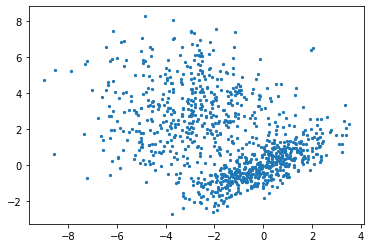

In [19]:
np.random.seed(0)
X = np.r_[np.dot(randn(n_samples,2),sigma1)+ mu1,
          np.dot(randn(n_samples,2), sigma2)+mu2]
plt.scatter(X[:,0],X[:,1], s=5)

[[0.2741537  0.7258463 ]
 [0.22386683 0.77613317]
 [0.30493493 0.69506507]
 ...
 [0.84630818 0.15369182]
 [0.69498018 0.30501982]
 [0.58173394 0.41826606]]


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


TypeError: ignored

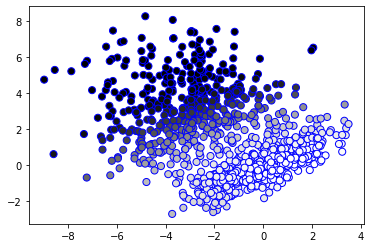

In [23]:
from sklearn.mixture import GaussianMixture


model = GaussianMixture(n_components=2, 
                        init_params="random",
                        random_state = 3,
                        tol=0.0001, max_iter=10)

model.fit(X)
pi = model.predict_proba(X)
print(pi)
plt.scatter(X[:,0], X[:,1], s= 50, linewidths=1, edgecolors='Blue',
              cmap=plt.cm.binary, c=pi[:,0])

plt.title("iteration :%d".format(n))


In [26]:
def plot_gaussian(n):
  model = GaussianMixture(n_components=2, 
                        init_params="random",
                        random_state = 3,
                        tol=0.0001, max_iter=10)

  model.fit(X)
  pi = model.predict_proba(X)
  print(pi)
  plt.scatter(X[:,0], X[:,1], s= 50, linewidths=1, edgecolors='Blue',
              cmap=plt.cm.binary, c=pi[:,0])

  plt.title("iteration :%d"%(n))

In [ ]:
for i [10,15,20,25,30]:
  plot_gaussian(i)
  plot

In [28]:
from sklearn.datasets import load_iris

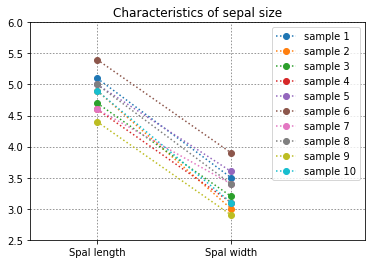

In [31]:
iris = load_iris()
N = 10
X = iris.data[:N, :2]

plt.plot(X.T, "o:")
plt.xticks(range(2), ["Spal length", "Spal width"])
plt.xlim(-0.5,2)
plt.ylim(2.5,6)
plt.legend(["sample %d"%(i+1) for i in range(N)])
plt.title("Characteristics of sepal size")
plt.grid(color = "gray", dashes=(2,2))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


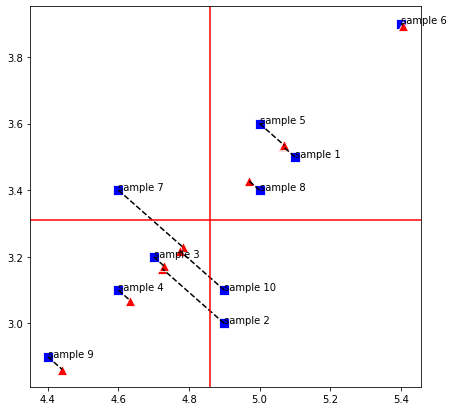

In [44]:
from sklearn.decomposition import PCA
import seaborn as sns 

pca = PCA(n_components = 1 )

X_low = pca.fit_transform(X)
X2 = pca.inverse_transform(X_low)

plt.figure(figsize=(7,7))
ax = sns.scatterplot(X[:,0], X[:,1], data= pd.DataFrame(X), s= 100,color='b', marker='s')
ax = sns.scatterplot(X2[:,0], X2[:,1], data= pd.DataFrame(X), s= 100, color='r', marker="^")


for i in range(N):
  ax.text(X[i,0], X[i,1], "sample %d"%(i+1))
  plt.plot([X[i,0],X2[i,0]], [X[i,1], X2[i,1]],"k--")
plt.axvline(X[:,0].mean(), c="r")
plt.axhline(X[:,1].mean(), c="r")



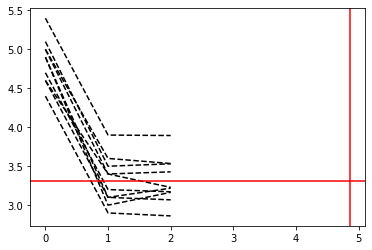

In [42]:

for i in range(N):
  ax.text(X[i,0], X[i,1], "sample %d"%(i+1))
  plt.plot([X[i,0], X[i,1], X2[i,1]], "k--")
plt.axvline(X[:,0].mean(), c="r")
plt.axhline(X[:,1].mean(), c="r")